# 04_3.One Sample t-test(연습문제2)
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [4]:
ost_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/04_4.painkiller.csv', encoding="cp949")
ost_df.head()

,지속시간1,지속시간2,지속시간3
0,299,295,294
1,300,296,295
2,294,290,294
3,294,290,295
4,296,292,296


### 2.2 자료구조 살펴보기

In [5]:
ost_df.shape

(51, 3)

In [6]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   지속시간1   51 non-null     int64
 1   지속시간2   51 non-null     int64
 2   지속시간3   51 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [7]:
ost_df.columns

Index(['지속시간1', '지속시간2', '지속시간3'], dtype='object')

## 3.기술통계

In [8]:
# 수치형 변수
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
지속시간1,51.0,303.47,4.29,294.0,301.0,303.0,306.0,313.0
지속시간2,51.0,299.47,4.29,290.0,297.0,299.0,302.0,309.0
지속시간3,51.0,298.90,4.00,292.0,296.0,298.0,301.0,308.0


In [9]:
ost_df.agg({"지속시간1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

,count,mean,std,min,max,median,skew,kurtosis
지속시간1,51.0,303.47,4.29,294.0,313.0,303.0,0.06,0.08


## 4.t-test

### 4.1 차이가 있는 경우(two-sided)

In [10]:
# two-sided
pg.ttest(ost_df["지속시간1"], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.782,50,two-sided,0.0,"[302.26, 304.68]",0.81,3.27e+04,1.0


In [11]:
# two-sided
pg.ttest(ost_df["지속시간2"], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.882,50,two-sided,0.382,"[298.26, 300.68]",0.124,0.22,0.139


In [12]:
# two-sided
pg.ttest(ost_df["지속시간3"], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.96,50,two-sided,0.056,"[297.78, 300.03]",0.274,0.89,0.485


### 4.2 양측과 단측 검정 비교(less)

In [18]:
# less
pg.ttest(ost_df["지속시간1"], 300, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.782,50,less,1.0,"[-inf, 304.48]",0.81,1.529e-05,0.0


In [19]:
# less
pg.ttest(ost_df["지속시간2"], 300, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.882,50,less,0.191,"[-inf, 300.48]",0.124,0.44,0.219


In [20]:
# less
pg.ttest(ost_df["지속시간3"], 300, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.96,50,less,0.028,"[-inf, 299.84]",0.274,1.779,0.613


## 5.가정검정

### 5.1 정규성 검정

In [13]:
pg.normality(ost_df["지속시간1"])

,W,pval,normal
지속시간1,0.977991,0.457431,True


In [14]:
pg.normality(ost_df).T.round(3)

,지속시간1,지속시간2,지속시간3
W,0.977991,0.977991,0.939749
pval,0.457431,0.457431,0.012
normal,True,True,False


### 5.2 이상치제거

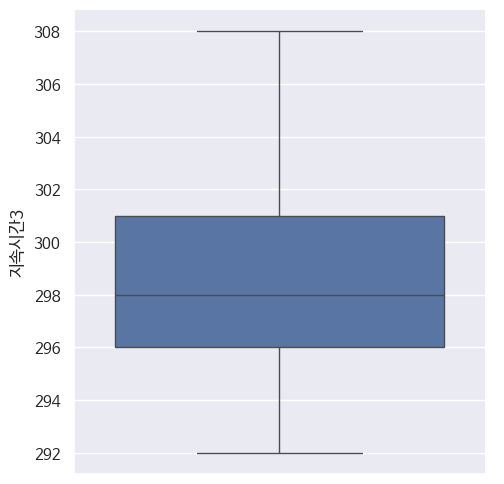

In [17]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "지속시간3",
            kind = "box")
plt.show()

## 6.비모수 통계

In [21]:
# 비모수통계
pg.wilcoxon(ost_df["지속시간3"] - 300, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,351.5,two-sided,0.039,-0.35,NaN


In [22]:
# 모수통계 결과와 비교
pg.ttest(ost_df["지속시간3"], 300, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.96,50,two-sided,0.056,"[297.78, 300.03]",0.274,0.89,0.485


In [23]:
# 비모수통계
pg.wilcoxon(ost_df["지속시간3"] - 300, alternative = "less").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,351.5,less,0.019,-0.35,NaN


In [24]:
# 모수통계 결과와 비교
pg.ttest(ost_df["지속시간3"], 300, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.96,50,less,0.028,"[-inf, 299.84]",0.274,1.779,0.613


## 7.검증결과 그래프

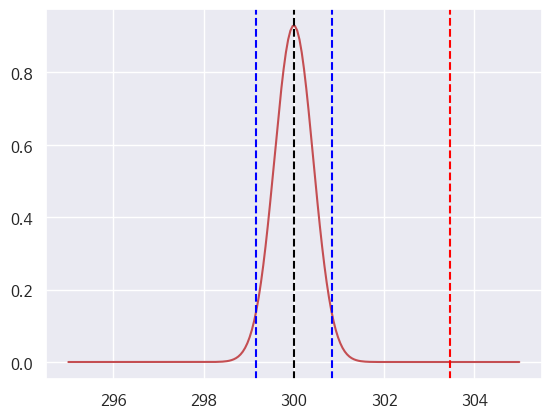

In [26]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(295, 305, 200)

mu = 300   # 모집단 평균
x = 303.47	 # 표본평균
std = 4.29/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu - 1.96 * std, color='blue', linestyle='--')
plt.axvline(x = mu + 1.96 * std, color='blue', linestyle='--')
plt.axvline(x = x, color='red', linestyle='--')
plt.show()